In [112]:
import fdb
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [117]:
# Define constants.
EXPORT_PATH = '~/Projects/noiva-linda/exports'

In [22]:
# Connect to FDB.
# Credentials in file: /etc/firebird/2.5/SYSDBA.password
con = fdb.connect(dsn='../base.fdb', user='sysdba', password='03caa3b6')

In [23]:
# Import all table names using pandas.
C000025 = pandas.read_sql("select CODIGO, CODBARRA, PRODUTO, DATA_CADASTRO, PRECOCUSTO, PRECOVENDA "
                          "from C000025", con)

In [24]:
# Filter absurd data.
print len(C000025[C000025.PRECOCUSTO == 0]), 'entries with PRECOCUSTO = 0'
print len(C000025[C000025.PRECOVENDA == 0]), 'entries with PRECOVENDA = 0'
C000025_filtered = C000025[C000025.PRECOCUSTO != 0]
C000025_filtered = C000025_filtered[C000025_filtered.PRECOVENDA != 0]
print len(C000025)-len(C000025_filtered), ' entries removed.', len(C000025_filtered), 'remaining.'

805 entries with PRECOCUSTO = 0
198 entries with PRECOVENDA = 0
835  entries removed. 14120 remaining.


In [25]:
# Second filter: some more absurd data. (here we can fix the data!)
data = C000025_filtered[C000025_filtered.PRECOCUSTO < 35000]
data = C000025_filtered[C000025_filtered.PRECOVENDA < 35000]

In [86]:
# Get some metadata!
date_min = data['DATA_CADASTRO'].min()
date_max = data['DATA_CADASTRO'].max()

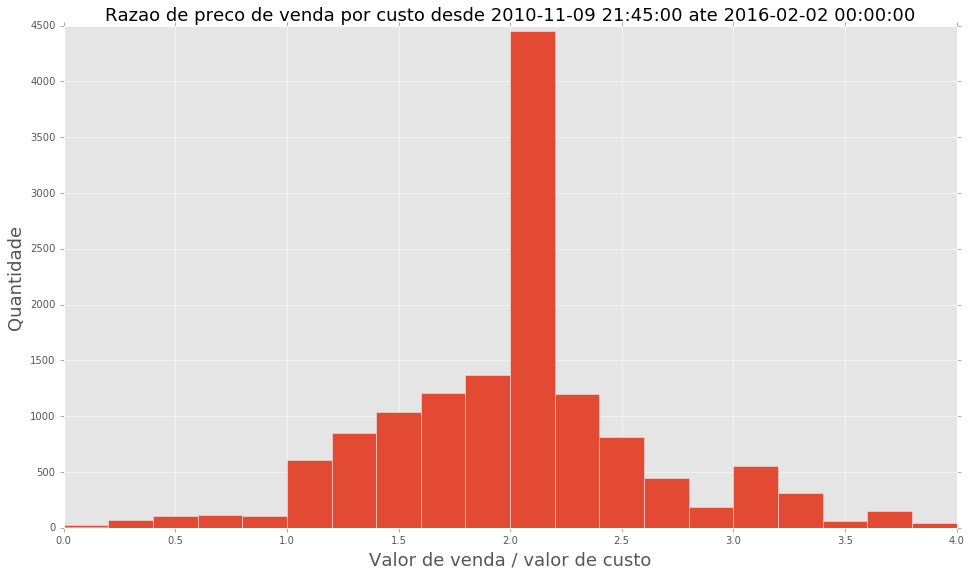

In [125]:
# Plots.
data.assign(LUCRO = data['PRECOVENDA']/data['PRECOCUSTO'])
plt.figure(figsize=(16,9)); plt.title('Razao de preco de venda por custo desde ' 
                                      + str(date_min) + ' ate ' + str(date_max), fontsize=18)
plt.xlabel('Valor de venda / valor de custo', fontsize=18)
plt.ylabel('Quantidade', fontsize=18)
plt.hist(data['LUCRO'].values, bins=20, range=[0,4], normed=False); plt.show()

In [121]:
# Export csv's.
data[data['LUCRO']<1.0].to_csv(EXPORT_PATH+'/produtos-lucro-negativo.csv')